In [1]:
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt

import IBD_RF_functions

In [2]:
data = pd.read_csv("./data/IBD_data_cleaned.csv",index_col=0)
data

,age,aweekend,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,dxccs1,...,_Ipayer_2,_Ipayer_3,_Ipayer_4,_Izipinc_qr_2,_Izipinc_qr_3,_Izipinc_qr_4,steroid_use,abd_pain_adm,aki_adm,gi_bleed_adm
0,89,1,1.071937,5.0,3,1,372,30,372,135.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
4,65,0,1.919980,1.0,5,2,387,30,387,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0
19,84,0,2.155742,6.0,5,2,690,30,690,159.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0
22,62,0,1.863343,5.0,2,1,853,30,853,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
23,40,0,1.509554,1.0,3,1,389,30,389,145.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0
30,68,1,2.148695,6.0,5,2,854,30,854,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
31,25,1,2.079331,1.0,2,1,385,30,385,144.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0
32,82,0,1.814426,6.0,5,2,247,30,247,100.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0
33,68,1,1.954297,5.0,2,1,557,30,557,211.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0
38,60,0,3.040344,1.0,1,1,385,30,385,144.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0


In [3]:
target_column = "ibd_readm"
data_no_target_column_df = data[[c for c in data.columns if c != target_column]]
data_no_target_column_df.shape

(36811, 263)

In [5]:
mann_whitney_univariate_df = pd.read_csv("./results/features_univariate_result.csv",index_col=0)
mann_whitney_univariate_df


,p-value,U,avg_readmit,95%CI_low_readmit,95%CI_high_readmit,avg_no_readmit,95%CI_low_no_readmit,95%CI_high_no_readmit,B-H_corrected_is_significant,B-H_corrected_p_val
_Iage_group_1,3.449382e-01,166139092.5,0.397700,0.390115,0.405285,0.397700,0.390115,0.405285,False,3.882721e-01
_Iage_group_2,4.230836e-01,166315077.5,0.390136,0.382576,0.397695,0.390136,0.382576,0.397695,False,4.556285e-01
_Inew_cc_in_1,4.670467e-02,165270997.5,0.220729,0.214301,0.227156,0.220729,0.214301,0.227156,False,6.418310e-02
_Inew_cc_in_2,3.575793e-74,152463691.0,0.310871,0.303698,0.318044,0.310871,0.303698,0.318044,True,2.053789e-73
_Ipayer_2,1.499409e-63,152650467.0,0.284178,0.277188,0.291168,0.284178,0.277188,0.291168,True,7.810875e-63
_Ipayer_3,5.945360e-04,165361452.5,0.036757,0.033841,0.039673,0.036757,0.033841,0.039673,True,1.024431e-03
_Ipayer_4,2.211659e-02,165788733.5,0.037882,0.034923,0.040841,0.037882,0.034923,0.040841,True,3.175716e-02
_Izipinc_qr_2,1.719787e-03,164239110.0,0.265987,0.259139,0.272835,0.265987,0.259139,0.272835,True,2.832590e-03
_Izipinc_qr_3,2.110394e-04,163777821.0,0.249547,0.242840,0.256254,0.249547,0.242840,0.256254,True,3.693189e-04
_Izipinc_qr_4,3.784433e-06,163061194.5,0.244233,0.237575,0.250892,0.244233,0.237575,0.250892,True,7.568866e-06


In [6]:
all_possible_features = ['age',
 'female',
 'los',
 'aweekend',
 'elective',
 'orproc',
 'hosp_urban_rural_location',
 'payer',
 'zipinc_qrtl',
 'severe_IBD_hospitalization',
 'cm_aids',
 'cm_alcohol',
 'cm_anemdef',
 'cm_arth',
 'cm_bldloss',
 'cm_chf',
 'cm_chrnlung',
 'cm_depress',
 'cm_coag',
 'cm_dm',
 'cm_dmcx',
 'cm_drug',
 'cm_htn_c',
 'cm_hypothy',
 'cm_liver',
 'cm_lymph',
 'cm_lytes',
 'cm_mets',
 'cm_neuro',
 'cm_obese',
 'cm_para',
 'cm_perivasc',
 'cm_psych',
 'cm_pulmcirc',
 'cm_renlfail',
 'cm_tumor',
 'cm_ulcer',
 'cm_valve',
 'cm_wghtloss',
 'diabetes',
 'copd',
 'cm_smoking',
 'blood_transfusion',
 'ibd_procedures',
 'cc_index',
 'new_cc_index',
 'fractures',
 'thromboses',
 'unplanned_adm',
 'pq1_dm_short',
 'pq2_perf_appendix',
 'pq3_dm_long',
 'pq5_copd_asthma',
 'pq7_htn',
 'pq8_chf',
 'pq10_dehydrate',
 'pq11_bacterialpna',
 'pq12_uti',
 'pq13_angina',
 'pq14_diabeteswocomp',
 'pq15_asthma',
 'pq16_dm_amputate',
 'new_mi_adm',
 'new_chf_adm',
 'new_unstableangina_adm',
 'new_arrhythmia_adm',
 'new_cardiacarrest_adm',
 'new_meningitis_adm',
 'new_encephalitis_adm',
 'new_endocarditis_adm',
 'new_pneumonia_adm',
 'new_pyelonephritis_adm',
 'new_osteo_adm',
 'new_septicemia_adm',
 'new_cdiff_adm',
 'new_tb_adm',
 'new_atypicalmyco_adm',
 'new_fungal_adm',
 'new_listeriosis_adm',
 'new_leishmaniasis_adm',
 'new_pcp_adm',
 'chronic_pain',
 'ibd_surgery_adm',
 'frailty_risk_score',
 'frailty_risk_category',
 'frailty_risk_category_index',
 'h_contrl',
 'hosp_bedsize',
 'hosp_ur_teach',
 'hosp_urcat4',
 'prevent_readm',
 'cardiac_adm',
 'cvd_adm',
 'resp_adm',
 'infxn_adm',
 'gu_adm',
 'gi_adm',
 'endo_adm',
 'neuro_adm',
 'malignancies_adm',
 'fracture_adm',
 'thrombosis_adm',
 'ibd_specific_adm',
 'others_adm']
known_values_univariate_df = mann_whitney_univariate_df.loc[all_possible_features]
known_values_univariate_significant = list(known_values_univariate_df.loc[known_values_univariate_df["B-H_corrected_p_val"]<0.05].index)

## Principle Components Analysis (just for fun)

In [7]:
def z_normalize_group(exp_df_in,do_clip = False,do_shift = False,do_rank = False):
    exp_df_in_norm = exp_df_in.copy()
    exp_df_in_norm = exp_df_in_norm[~exp_df_in_norm.index.duplicated(keep='first')]
    if do_rank==True:
        exp_df_in_norm = exp_df_in_norm.rank(axis=0, method='average', numeric_only=None, na_option='keep', ascending=True, pct=False)
    exp_df_in_means = exp_df_in_norm.mean(axis=1)
    exp_df_in_stds = exp_df_in_norm.std(axis=1)
    for i in exp_df_in_norm.index:
        #print(exp_df_in_norm.loc[i,:])
        exp_df_in_norm.loc[i,:] = (exp_df_in_norm.loc[i,:] - exp_df_in_means.loc[i])/exp_df_in_stds.loc[i]
    if do_clip==True:
        exp_df_in_norm.clip(-2, 2, inplace=True) 
    if do_shift==True:
        exp_df_in_norm = exp_df_in_norm + 2
    return exp_df_in_norm

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


data_for_PCA = data[known_values_univariate_significant]
PCA_model = PCA().fit(data_for_PCA)
print(PCA_model.explained_variance_ratio_)

[6.98550904e-01 1.99925492e-01 3.31633303e-02 1.35414382e-02
 5.86264328e-03 5.04119538e-03 4.38992034e-03 4.27720439e-03
 3.74660862e-03 2.72284753e-03 2.21043477e-03 2.16547222e-03
 1.84061328e-03 1.72277603e-03 1.62689991e-03 1.46457704e-03
 1.41534419e-03 1.33832562e-03 1.26923358e-03 1.07428838e-03
 9.98530369e-04 9.20937580e-04 8.38944009e-04 7.87502050e-04
 6.98863255e-04 6.73245342e-04 6.41102769e-04 5.58186338e-04
 5.39049551e-04 5.25117861e-04 5.15044501e-04 4.74152073e-04
 4.54024107e-04 4.36392632e-04 4.23951936e-04 3.49542419e-04
 3.32377001e-04 3.01445332e-04 2.92997867e-04 2.66117394e-04
 1.94206847e-04 1.90357900e-04 1.74718617e-04 1.49302485e-04
 1.45194466e-04 1.23280614e-04 1.14048487e-04 9.45366787e-05
 8.73863153e-05 8.17449494e-05 6.58738110e-05 4.93981124e-05
 3.68081174e-05 3.63139573e-05 2.96890834e-05 1.72889266e-05
 1.45540489e-05 1.07073824e-05 3.94843913e-06 3.56714185e-06
 2.28032378e-31 6.72535484e-33]


The 5 variables highlighted in Figure 3b are the darker "bars" in the heatmap.

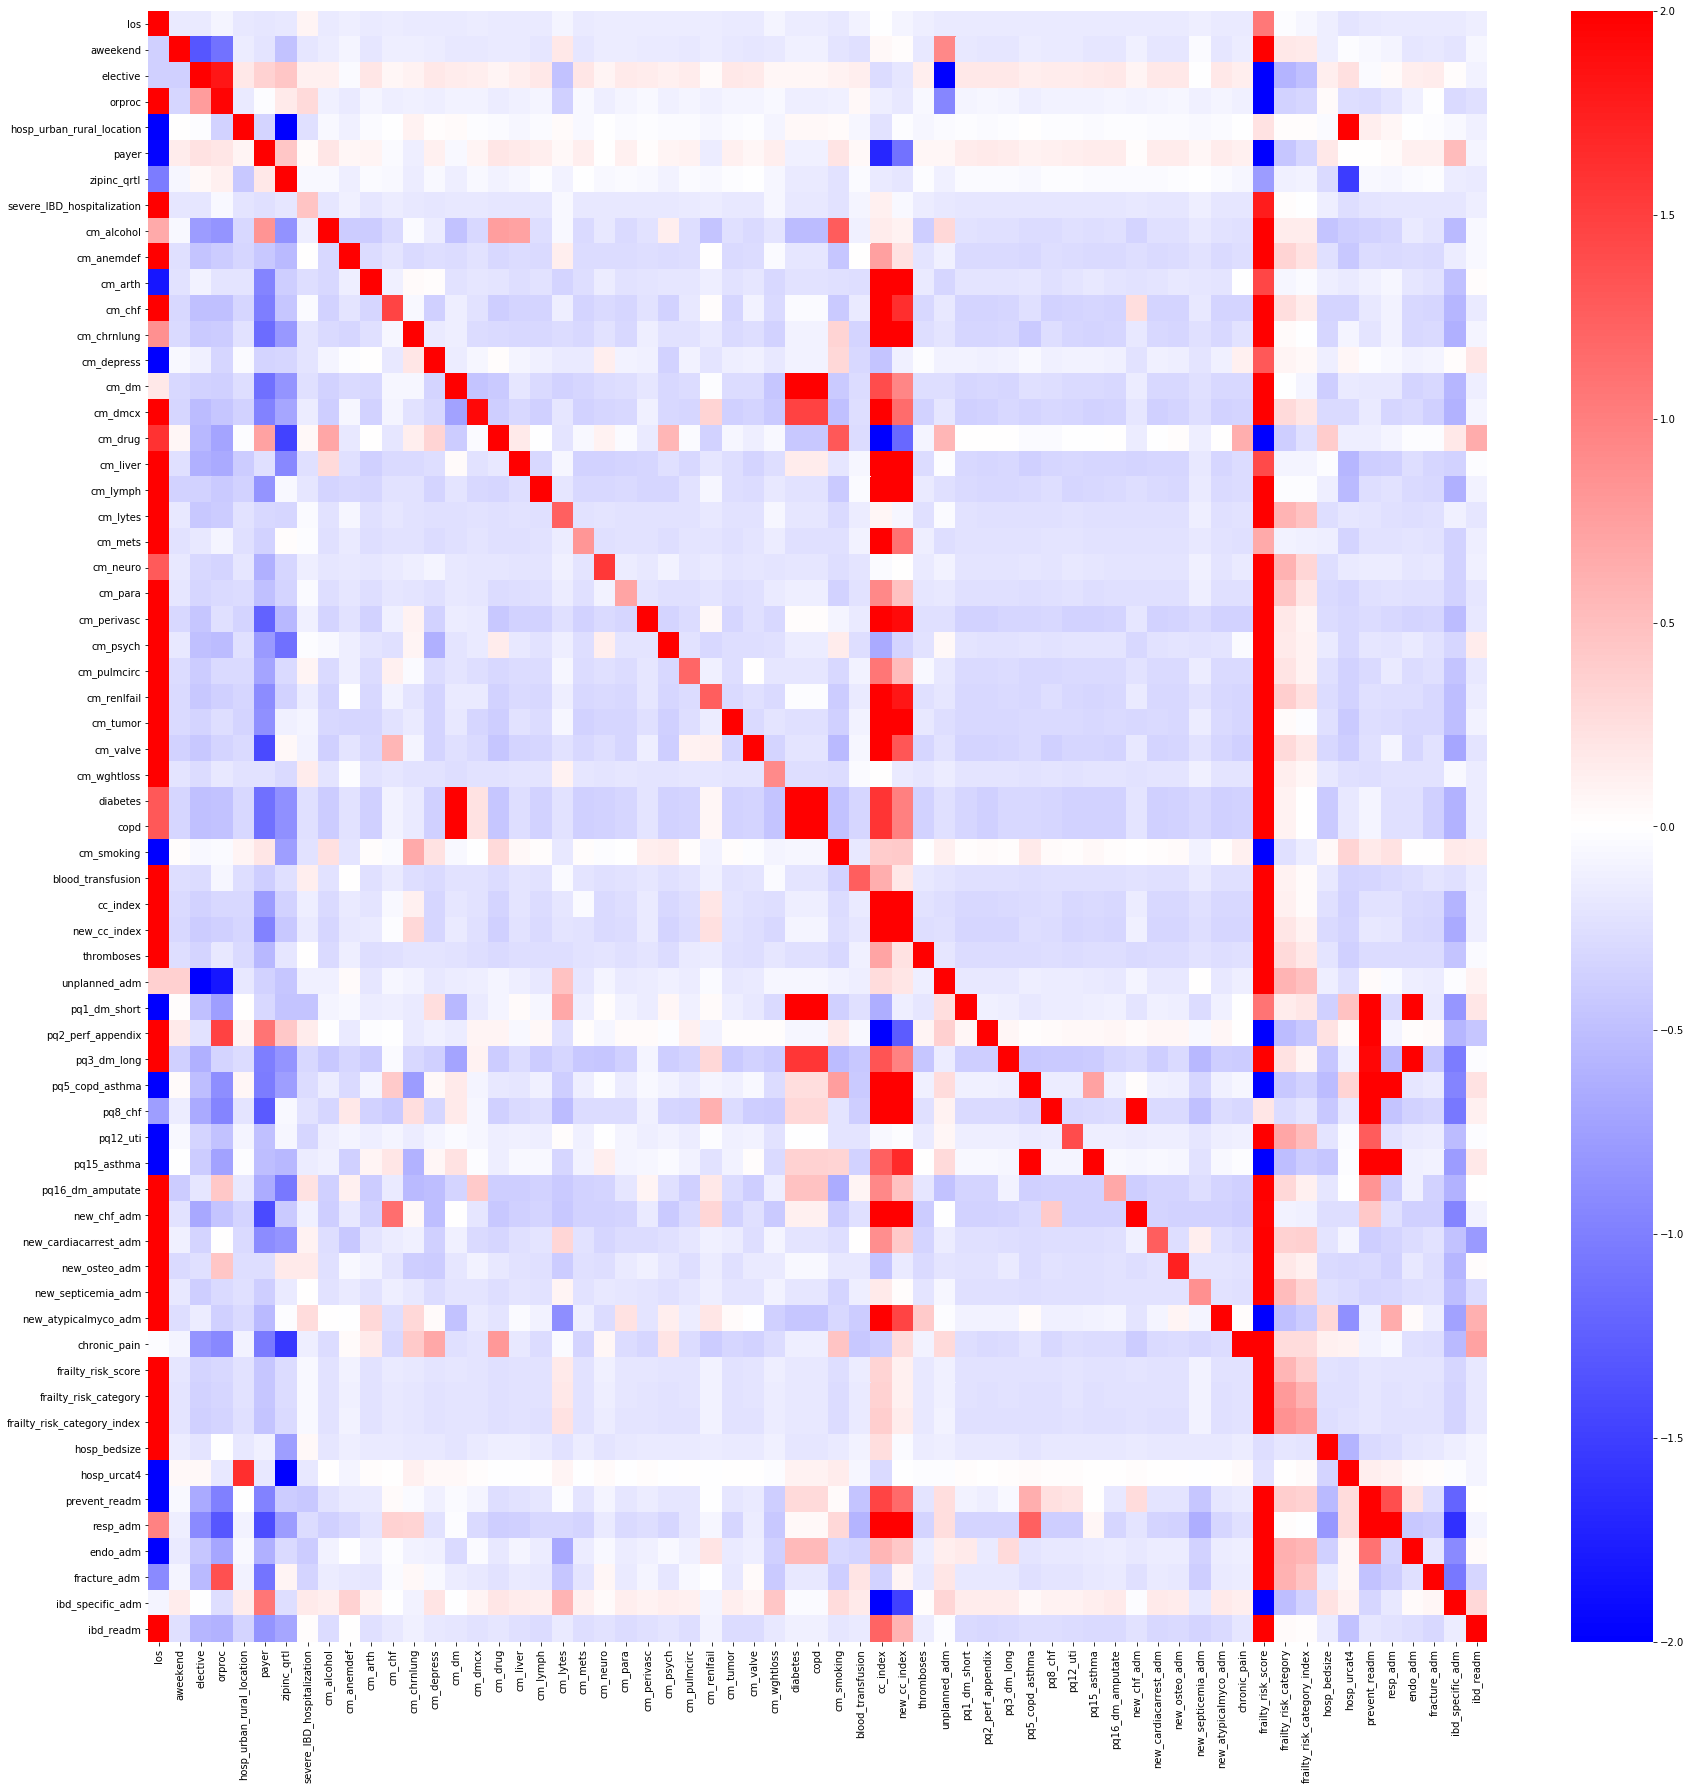

In [10]:
covariance_df = z_normalize_group(data[known_values_univariate_significant +[target_column]].cov(),do_clip=True)
fig = plt.figure(figsize=(30, 30))
sns.heatmap(covariance_df,cmap ="bwr",center=0)
plt.show()

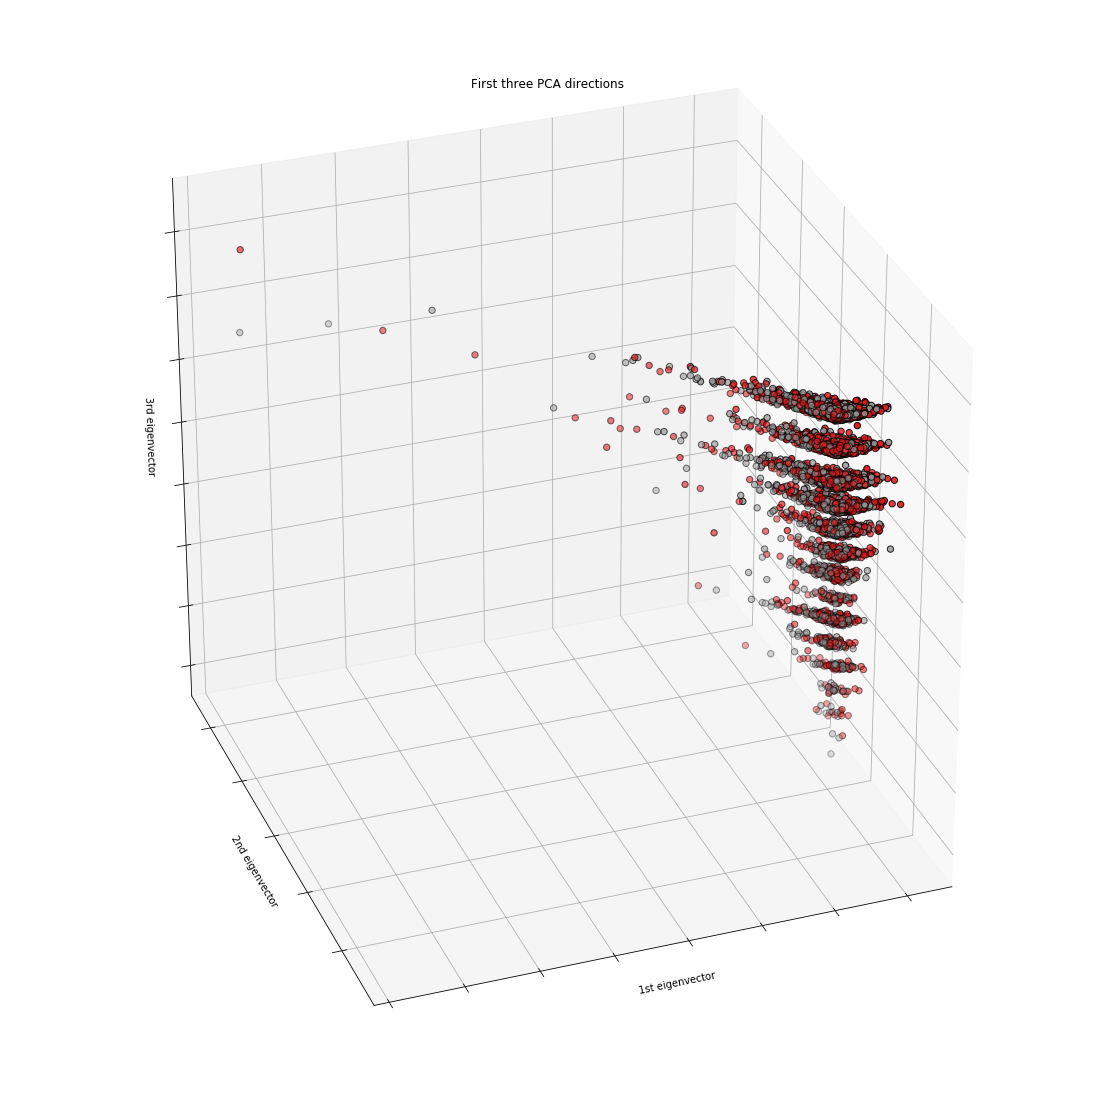

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(15, 15))
ax = Axes3D(fig, elev=-150, azim=110)

data_for_PCA = data[known_values_univariate_significant]

X_reduced = PCA().fit_transform(data_for_PCA)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=data[target_column],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

The readmitted patients are pretty well-mixed in with the other patients.

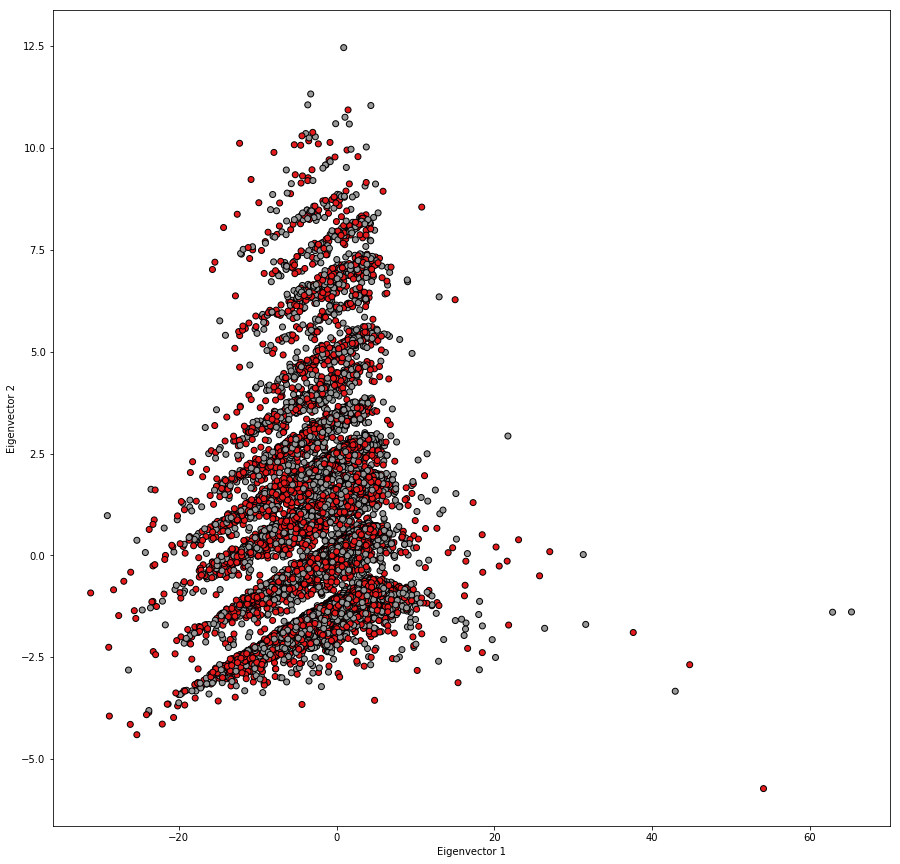

In [12]:
fig = plt.figure(1, figsize=(15, 15))
plt.scatter(X_reduced[:, 1], X_reduced[:, 2], c=data[target_column], cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')

#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())
plt.show()

## NMF Components instead of individual Features

Note for Adam: NMF clustering performed using PCAL, the newest version of Pablo's CCAL package that I (Tim) don't have permission to distribute yet.

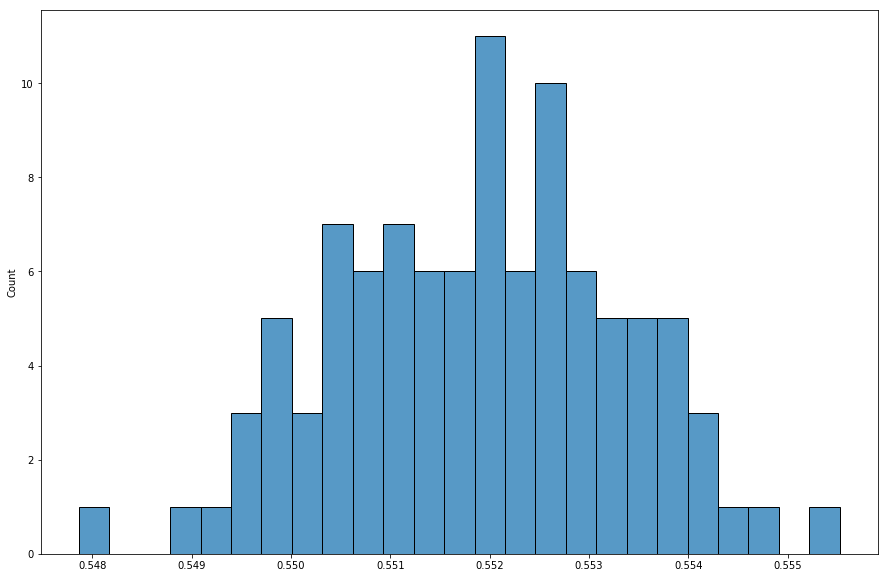

In [18]:
from os.path import join

n_components = 4
H_matrix_df = pd.read_csv(join("./NMF/k{}/".format(n_components),"h_norm_k{}.csv".format(n_components)),index_col=0)

optimum_RF_parameters = {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 1000, 'n_estimators': 150}

NMF_scores_series, NMF_feature_importances_df = IBD_RF_functions.repeatedly_train_test_random_forest_model(H_matrix_df.T,
                                                                 data[target_column],
                                                                 n_iterations=100,
                                                                 train_proportion=0.5,
                                                                 params_dict = optimum_RF_parameters,
                                                                 n_jobs=12)

#RF_feature_importances_df = pd.read_csv("./feature_importances/best_RF_12-9-2020.csv",index_col=0)
fig, ax = plt.subplots(figsize=(15,10))
sns.histplot(NMF_scores_series,bins=25)
plt.show()

In [24]:
NMF_model_mean,NMF_model_CI_low,NMF_model_CI_high = IBD_RF_functions.mean_confidence_interval(NMF_scores_series)
print("Mean: {} 95%CI: [{} - {}]".format(NMF_model_mean,NMF_model_CI_low,NMF_model_CI_high))

Mean: 0.5518754753884604 95%CI: [0.5515916160526191 - 0.5521593347243017]


In [20]:
NMF_scores_series.std()

0.0014305861847692372

Mean of NMF model is lower than using raw features due to data processing inequality.

## SVM

### DO NOT RUN: TAKES FOREVER

I didn't even try anything below this point since it would have taken multiple weeks to finish on my computer.

In [ ]:
param_grid_SVM = {'kernel': ['rbf','linear','poly','rbf','sigmoid'],
              'C': [2.0,1.0,0.75,0.5,0.25],
              'degree':[2,3,4],
              'gamma':['scale','auto'],
              'coef0':[0.0,0.5,0.25,0.75,1.0,1.5,2],
              'shrinking':[True,False],
              'class_weight':[None,'balanced'],
                  'decision_function_shape':['ovo','ovr'],
                  
                 }

In [ ]:
from sklearn import svm

#X_train_known_features, X_test_known_features, y_train_known_features, y_test_known_features = train_test_split(H_matrix_df.T, data[target_column], random_state=42,train_size=0.25)


IBD_SVM = svm.SVC()
#IBD_LR_SVM.fit(X_train_known_features, y_train_known_features)
#IBD_LR_SVM.score(X_test_known_features,y_test_known_features)
grid_SVM = GridSearchCV(IBD_SVM,param_grid_SVM, verbose=3,n_jobs=12,error_score=np.nan)
grid_SVM.fit(X_train_known_features, y_train_known_features)

In [ ]:
pd.DataFrame(grid_SVM.cv_results_).to_csv("SVM_multifactorial_12-9-2020.csv")
print(grid_SVM.best_params_)
print(grid_SVM.best_score_)

In [ ]:
from sklearn import svm

X_train_known_features, X_test_known_features, y_train_known_features, y_test_known_features = train_test_split(data_known_features_no_target_column_df, data[target_column], random_state=42,train_size=0.25)


IBD_LR_SVM = svm.SVC()
IBD_LR_SVM.fit(X_train_known_features, y_train_known_features)
IBD_LR_SVM.score(X_test_known_features,y_test_known_features)